In [1]:
import gzip
import math
import random
import scipy
import scipy.optimize
import numpy
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import linear_model
import json

In [2]:
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield json.loads(l)

In [3]:
rawdata = list(parse("Office_Products_5.json.gz"))

In [4]:
len(rawdata)

800357

In [78]:
vote = []
non_vote = []

In [79]:
for d in rawdata:
    if "vote" in d:
        vote.append(d)
    else:
        non_vote.append(d)

In [80]:
vote[0]

{'overall': 4.0,
 'vote': '13',
 'verified': True,
 'reviewTime': '06 28, 2014',
 'reviewerID': 'A3INJI4T4U2JJS',
 'asin': '0310432065',
 'style': {'Format:': ' Diary'},
 'reviewerName': 'WV Owl Gal',
 'reviewText': 'That being said ...\nI do like that it keeps all things easily @ hand ...\nI do use it all week to study me Sabbath School Lesson ...\nI use it also on a weekly basis to carry lesson & Bible to church ...\nIt is good in theory ...\nNeeds to be a bit firmer in construction ...',
 'summary': "Don't Have a Title ...",
 'unixReviewTime': 1403913600}

In [8]:
len(vote)

88817

In [9]:
non_vote_sample = random.sample(non_vote, 150000 - len(vote))

In [10]:
len(non_vote_sample)

61183

In [11]:
dataset = vote + non_vote_sample

In [12]:
len(dataset)

150000

In [15]:
file = open('Office_Products_5_150000.json', 'w')
for i in dataset:
    json_i = json.dumps(i)
    file.write(json_i+'\n')
file.close()

In [16]:
###############################################

In [19]:
cnt1 = 0
cnt2 = 0
cnt3 = 0
cnt4 = 0
cnt5 = 0
rating_sum = 0

for d in dataset:
    r = d["overall"]
    rating_sum += r
    if r == 1.0:
        cnt1 += 1
    elif r == 2.0:
        cnt2 += 1
    elif r == 3.0:
        cnt3 += 1
    elif r == 4.0:
        cnt4 += 1
    elif r == 5.0:
        cnt5 += 1
    else:
        print("invalid rating")

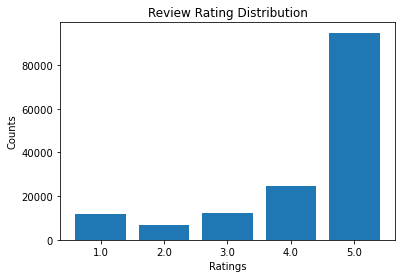

In [20]:
label_list = ['1.0', '2.0', '3.0', '4.0', '5.0']
num_list = [cnt1, cnt2, cnt3, cnt4, cnt5]
plt.bar(label_list, num_list)
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.title("Review Rating Distribution")
plt.show()

In [22]:
rating_sum/len(dataset)

4.227426666666667

In [29]:
productCount = defaultdict(int)
userSet = set()
productSet = set()
userPerProduct = defaultdict(set)
productPerUser = defaultdict(set)
ratingDict = {}

In [30]:
for d in dataset:
    user,product = d['reviewerID'], d['asin']
    productCount[product] += 1
    userSet.add(user)
    productSet.add(product)
    userPerProduct[product].add(user)
    productPerUser[user].add(product)
    ratingDict[(user,product)] = d['overall']

In [31]:
len(productCount)

24247

In [32]:
len(userSet)

68186

In [33]:
len(productSet)

24247

In [34]:
userAverages = {}
productAverages = {}

for u in productPerUser:
    rs = [ratingDict[(u,i)] for i in productPerUser[u]]
    if len(rs) == 0:
        userAverages[u] = 0
        continue
    userAverages[u] = sum(rs) / len(rs)
    
for i in userPerProduct:
    rs = [ratingDict[(u,i)] for u in userPerProduct[i]]
    if len(rs) == 0:
        productAverages[i] = 0
        continue
    productAverages[i] = sum(rs) / len(rs)

In [36]:
len(userAverages)

68186

In [37]:
type(userAverages)

dict

In [47]:
x = list(range(1, len(userAverages) + 1))

In [53]:
y = sorted(userAverages.values())

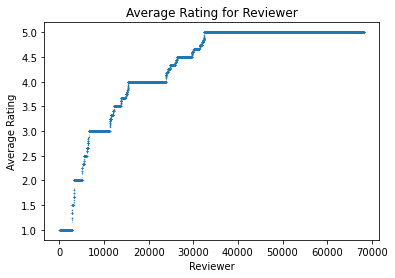

In [61]:
plt.scatter(x, y, marker = '.', s = 0.1)
plt.xlabel('Reviewer')
plt.ylabel('Average Rating')
plt.title('Average Rating for Reviewer')
plt.show()

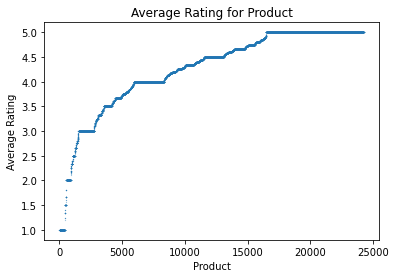

In [62]:
x = list(range(1, len(productAverages) + 1))
y = sorted(productAverages.values())
plt.scatter(x, y, marker = '.', s = 0.1)
plt.xlabel('Product')
plt.ylabel('Average Rating')
plt.title('Average Rating for Product')
plt.show()

In [86]:
votecount1 = defaultdict(int)

In [89]:
for d in vote:
    v = int(d['vote'].replace(",",""))
    votecount1[v] += 1

In [91]:
f = zip(votecount1.keys(), votecount1.values())
c = sorted(f)

In [92]:
c

[(2, 30295),
 (3, 15235),
 (4, 8873),
 (5, 6002),
 (6, 4306),
 (7, 3170),
 (8, 2426),
 (9, 2043),
 (10, 1698),
 (11, 1283),
 (12, 1150),
 (13, 987),
 (14, 824),
 (15, 772),
 (16, 688),
 (17, 568),
 (18, 518),
 (19, 430),
 (20, 418),
 (21, 357),
 (22, 346),
 (23, 316),
 (24, 268),
 (25, 278),
 (26, 229),
 (27, 225),
 (28, 214),
 (29, 178),
 (30, 207),
 (31, 164),
 (32, 138),
 (33, 136),
 (34, 136),
 (35, 121),
 (36, 109),
 (37, 83),
 (38, 121),
 (39, 109),
 (40, 98),
 (41, 113),
 (42, 79),
 (43, 76),
 (44, 100),
 (45, 77),
 (46, 57),
 (47, 78),
 (48, 56),
 (49, 62),
 (50, 55),
 (51, 60),
 (52, 60),
 (53, 46),
 (54, 49),
 (55, 44),
 (56, 57),
 (57, 37),
 (58, 46),
 (59, 47),
 (60, 31),
 (61, 34),
 (62, 33),
 (63, 28),
 (64, 42),
 (65, 35),
 (66, 39),
 (67, 35),
 (68, 26),
 (69, 33),
 (70, 24),
 (71, 15),
 (72, 30),
 (73, 28),
 (74, 27),
 (75, 20),
 (76, 31),
 (77, 26),
 (78, 23),
 (79, 27),
 (80, 21),
 (81, 29),
 (82, 13),
 (83, 13),
 (84, 22),
 (85, 26),
 (86, 21),
 (87, 25),
 (88, 18),